## Chuẩn hóa text

## Make Data

In [49]:
import re
import unicodedata
from argparse import ArgumentParser
from pathlib import Path

import soundfile as sf

In [57]:
# Lấy các từ có trong dataset
from pathlib import Path
metadata_path = Path('metadata.txt')
word_file = open("./content/words.txt", "w", encoding="utf-8")
word_dict = set()
with open(metadata_path, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        line = line.strip()
        text = line.split('|')[1]
        # print(text)
        for w in text.strip().lower().split():
            word_dict.add(w)
sorted_words = sorted(word_dict)
word_file.write('\n'.join(sorted_words))
print(len(sorted_words))

4412


In [58]:
black_list = (
    []
    + ["q", "adn", "h", "stress", "b", "k", "mark", "gas", "cs", "test", "l", "hiv"]
    + ["v", "d", "c", "p", "martin", "visa", "euro", "laser", "x", "real", "shop"]
    + ["studio", "kelvin", "đt", "pop", "rock", "gara", "karaoke", "đicr", "đigiúp"]
    + ["khmer", "ii", "s", "tr", "xhcn", "casino", "guitar", "sex", "oxi", "radio"]
    + ["qúy", "asean", "hlv" "ts", "video", "virus", "usd", "robot", "ph", "album"]
    + ["s", "kg", "km", "g", "tr", "đ", "ak", "d", "m", "n"]
)

In [59]:
# Tách từ thành các âm tiết
ws = open("./content/words.txt").readlines()
f = open("./content/lexicon.txt", "w")
for w in sorted(set(ws)):
    w = w.strip()
    # this is a hack to match phoneme set in the repo
    p = list(w)
    p = " ".join(p)
    if w in black_list:
        continue
    else:
        f.write(f"{w}\t{p}\n")
f.close()

In [1]:
!mfa train --clean -t ./temp -o ./infore_mfa.zip ./infore_16k_denoised lexicon.txt ./infore_textgrid

fish: Unknown command: mfa
fish: 
mfa train --clean -t ./temp -o ./infore_mfa.zip ./infore_16k_denoised lexicon.txt ./infore_textgrid
^


## Train


### Train duration model

In [1]:
import vntts.nat.duration_trainer as duration_trainer
duration_trainer.train()

2022-10-26 22:58:15.993807: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 22:58:16.020692: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 22:58:16.022490: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
/home/nguyen/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable

Loading latest checkpoint from file assets/infore/nat/duration_latest_ckpt.pickle


training:  35%|███████████▉                      | 70001/200001 [00:00<?, ?it/s]2022-10-26 22:58:57.028756: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:401] There was an error before creating cudnn handle: cudaGetErrorName symbol not found. : cudaGetErrorString symbol not found.
2022-10-26 22:58:57.037293: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-10-26 22:58:57.037318: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:433] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-10-26 22:58:57.037363: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:401] There was an error before creating cudnn handle: cudaGetErrorName symbol not found. : cudaGetErrorString symbol not found.
2022-10-

XlaRuntimeError: UNKNOWN: Failed to determine best cudnn convolution algorithm for:
%cudnn-conv-bw-filter = (f32[3,256,256]{0,1,2}, u8[0]{0}) custom-call(f32[64,256,256]{1,2,0} %multiply.18, f32[64,256,256]{1,2,0} %add.1759), window={size=3 pad=1_1}, dim_labels=b0f_0io->b0f, custom_call_target="__cudnn$convBackwardFilter", metadata={op_name="jit(update)/jit(main)/transpose(jvp(duration_model))/token_encoder/conv1_d_2/conv_general_dilated[window_strides=(1,) padding=((1, 1),) lhs_dilation=(1,) rhs_dilation=(1,) dimension_numbers=ConvDimensionNumbers(lhs_spec=(2, 0, 1), rhs_spec=(2, 0, 1), out_spec=(1, 2, 0)) feature_group_count=1 batch_group_count=1 lhs_shape=(64, 256, 256) rhs_shape=(64, 256, 256) precision=None preferred_element_type=None]" source_file="/home/nguyen/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/haiku/_src/conv.py" source_line=205}, backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"

Original error: UNIMPLEMENTED: DNN library is not found.

To ignore this failure and try to use a fallback algorithm (which may have suboptimal performance), use XLA_FLAGS=--xla_gpu_strict_conv_algorithm_picker=false.  Please also file a bug for the root cause of failing autotuning.

### Train acoustic model

In [2]:
import vntts.nat.acoustic_trainer as acoustic_trainer
acoustic_trainer.train()

KeyboardInterrupt: 

### HiFiGAN vocoder

In [ ]:
!python train.py \
  --config ../assets/hifigan/config.json \
  --input_wavs_dir=data \
  --input_training_file=train_files.txt \
  --input_validation_file=val_files.txt

# WEB App

In [ ]:
!uvicorn main:app --host 0.0.0.0 --port 8000 --reload

# Test


In [7]:
import re
import unicodedata
from argparse import ArgumentParser
from pathlib import Path
import matplotlib.pyplot as plt


import soundfile as sf

from vntts.hifigan.mel2wave import mel2wave
from vntts.nat.config import FLAGS
from vntts.nat.text2mel import text2mel

In [2]:
# Chuẩn hóa text
def nat_normalize_text(text):
    """
    It removes all punctuation, replaces it with a silence token, and then normalizes the text
    
    :param text: The text to be normalized
    :return: The text is being normalized.
    """
    text = unicodedata.normalize("NFKC", text)
    text = text.lower().strip()
    sil = FLAGS.special_phonemes[FLAGS.sil_index]
    text = re.sub(r"[\n.,:]+", f" {sil} ", text)
    text = text.replace('"', " ")
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[.,:;?!]+", f" {sil} ", text)
    text = re.sub("[ ]+", " ", text)
    text = re.sub(f"( {sil}+)+ ", f" {sil} ", text)
    return text.strip()

In [44]:
text = "a"
text = nat_normalize_text(text)
print("Normalized text input:", text)

Normalized text input: a


In [38]:
from vntts.nat.data_loader import load_phonemes_set

# Danh sách các âm tiết
print(load_phonemes_set())

['sil', 'sp', 'spn', ' ', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'ă', 'đ', 'ĩ', 'ũ', 'ơ', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ẹ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỵ', 'ỷ', 'ỹ']


In [45]:
from vntts.nat.text2mel import text2tokens
tokens = text2tokens(text, lexicon_fn=FLAGS.lexicon_dir / "lexicon.txt")
print("Tokens:", tokens, len(tokens))

Tokens: [0, 4, 3, 0] 4


In [46]:
from vntts.nat.text2mel import predict_duration
duration = predict_duration(tokens)
print("Duration:", duration, len(duration[0]))

Duration: [[0.45421353 0.23314038 0.1138085  0.10309638]] 4


Mel shape: (1, 56, 80)
[[-11.402764  -11.691302  -11.469669  ... -11.523671  -11.498272
  -11.4840765]
 [-11.374912  -11.693808  -11.482694  ... -11.46592   -11.478227
  -11.42767  ]
 [-11.406934  -11.652754  -11.494629  ... -11.461114  -11.512471
  -11.386238 ]
 ...
 [-11.527506  -11.699999  -11.611497  ... -11.484379  -11.606453
  -11.387037 ]
 [-11.516578  -11.753364  -11.652244  ... -11.484388  -11.593635
  -11.434913 ]
 [-11.510246  -11.716234  -11.5962305 ... -11.462276  -11.552698
  -11.411571 ]]


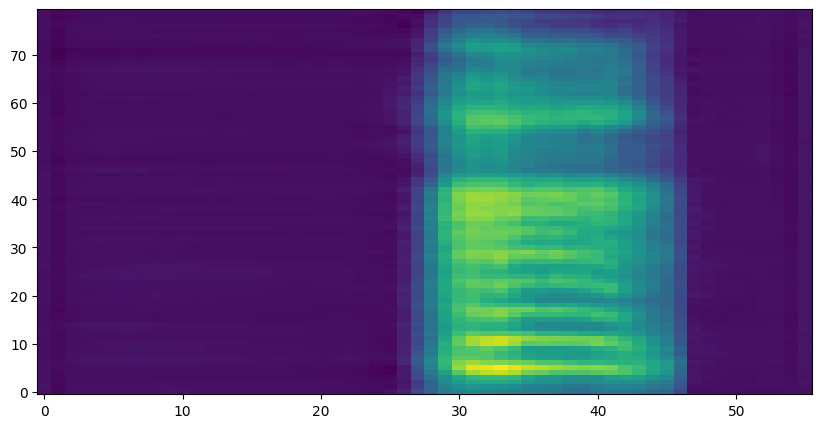

In [47]:
from vntts.nat.text2mel import predict_mel


mel_pred = predict_mel(tokens, duration)
print("Mel shape:", mel_pred.shape)
print(mel_pred[0].T)
plt.figure(figsize=(10, 5))
plt.imshow(mel_pred[0].T, origin="lower", aspect="auto")

In [48]:

import IPython.display as ipd

wave = mel2wave(mel_pred)
sf.write("audio.wav", wave, samplerate=16000)
ipd.Audio("audio.wav") 

[[-11.481994  -11.703799  -11.522328  ...  -7.257395   -7.3989053
   -7.368987 ]
 [-11.456428  -11.663625  -11.466896  ...  -6.3635993  -6.5652356
   -6.721802 ]
 [-11.4657755 -11.643337  -11.492366  ...  -5.661421   -6.1570973
   -6.259916 ]
 ...
 [-11.53148   -11.655971  -11.577359  ... -10.443935  -11.053428
  -10.794072 ]
 [-11.5091715 -11.699029  -11.602093  ... -10.225744  -10.735661
  -10.535678 ]
 [-11.530831  -11.66935   -11.556842  ... -10.530658  -10.85446
  -10.57205  ]]


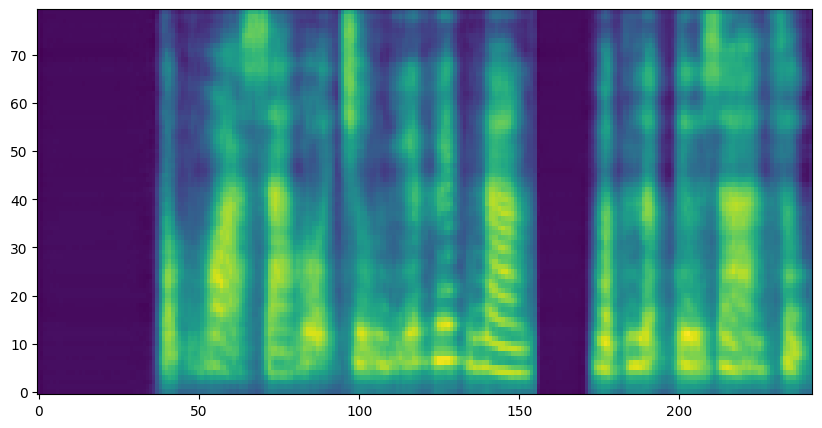

In [11]:
mel = text2mel(text)
print(mel[0].T)
plt.figure(figsize=(10, 5))
plt.imshow(mel[0].T, origin="lower", aspect="auto")
# plt.savefig(str(args.output))
# plt.close()


In [27]:

import IPython.display as ipd

wave = mel2wave(mel)
sf.write("audio.wav", wave, samplerate=16000)
ipd.Audio("audio.wav") 

In [28]:
len(wave)

61952

In [17]:
import librosa
x, sr = librosa.load("audio.wav")

In [19]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)

/root/.local/share/virtualenvs/vietTTS-WPp6uIsz/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.13.0+cu117
0.13.0+cu117
